Kien Truong
<br>
CPSC 483-02
<br>
Professor Avery
<br>
Due date: 04/23/2021
<br>
$$ Project#5 description $$
<br>
This project will utilize and compare decision boundaries defined by some of the simpler classifier algorithms (Logistic Regression, Gaussian Naive Bayes classifier, and KNN classifier) given some toy data sets.
<br>
Steps approached:
1. Load and examine each dataset using pd.read.csv()
2. Use logistic regression to fit() and score() a binary classifier for dataset 1 and dataset 2. Compare their scores.
3. Create separate scatterplots for datasets 1 and 2 using seaborn. What accounts for the discrepancies between experiement 2 (score() of dataset 1 vs score() of dataset 2)
4. Use Naive Bayes classifiers to fit() and score() a binary classifier for dataset 1 and dataset 2. Compare their scores to logistic regression.
5. Use K-Nearest Neighbor classifiers to fit() and score() a binary classifier for dataset 1 and dataset 2. Compare their scores to logistic regression.
6. Plot the decision boundaries for each classifier and dataset. What differences do you observe?
7. Repeat experiment 2, 4, 5, and 6 with dataset 3.

In [1]:
import numpy as np
import pandas as pd

In [2]:
'''
Question 1 - Use read_csv() to load and examine each dataset
'''
data1 = pd.read_csv('dataset1.csv', header=None)
data2 = pd.read_csv('dataset2.csv', header=None)
data3 = pd.read_csv('dataset3.csv', header=None)
data1

,0,1,2
0,1.800539,-0.539218,0
1,24.330831,26.439146,1
2,21.124114,21.166814,1
3,10.517197,11.175424,0
4,19.737721,23.341138,1
...,...,...,...
195,7.701944,5.303327,0
196,24.079743,24.066883,1
197,24.351346,20.908176,1
198,24.688063,24.996258,1


In [3]:
'''
Question 2 - Use logistic regression to fit() and score() for dataset 1
'''
from sklearn.linear_model import LogisticRegression
#Separate the last column from the dataset
X1 = np.array(data1.iloc[:,:-1])
t1 = np.array(data1.iloc[:,-1])
logistic_reg = LogisticRegression().fit(X1, t1)
R_squared = logistic_reg.score(X1, t1)
print(f"The logistic score value for dataset 1 is {R_squared}")

The logistic score value for dataset 1 is 1.0


The model predicts very well because the score value is 1.0

In [4]:
'''
Question 3 - Use logistic regression to fit() and score() for dataset 2
'''
from sklearn.linear_model import LogisticRegression
#Separate the last column from the dataset
X2 = np.array(data2.iloc[:,:-1])
t2 = np.array(data2.iloc[:,-1])
logistic_reg = LogisticRegression().fit(X2, t2)
R_squared = logistic_reg.score(X2, t2)
print(f"The logistic score value for dataset 2 is {R_squared}")

The logistic score value for dataset 2 is 0.525


This model performs worse than the previous model because its score value is 0.525, which is smaller than the previous model (1.0)

<AxesSubplot:title={'center':'Dataset 2'}, xlabel='0', ylabel='1'>

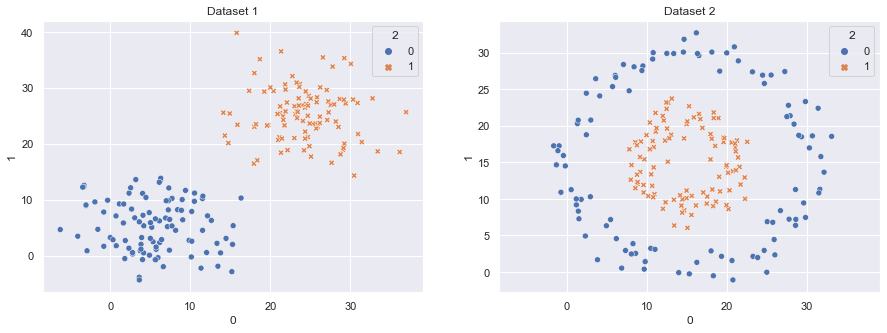

In [5]:
'''
Question 4 - Create scatterplots for datasets 1 and 2.
'''
import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
'''
Plotting dataset 1
'''
axes[0].set_title("Dataset 1")
sns.scatterplot(ax=axes[0], x=data1[0], y=data1[1], hue=data1[2], data=data1, style=data1[2])

'''
Plotting dataset 2
'''
axes[1].set_title("Dataset 2")
sns.scatterplot(ax=axes[1], x=data2[0], y=data2[1], hue=data2[2], data=data2, style=data2[2])


The scatterplot for dataset 1 shows a clear separation of two classes (class 0 and class 1) and the decision boundary can split the dataset perfectly into two different sets, which results the score value of 1.0. However, the scatterplot for dataset 2 could not perfectly split the two sets - one side of the decision boundary will include points from another class; therefore, it results a score value of 0.525, which is lower than the previous model (dataset 1)

In [6]:
'''
Question 5 - fit() and score() Gaussian Naive Bayes classifiers for datasets 1 and 2.
'''
from sklearn.naive_bayes import GaussianNB
'''
----- Dataset 1 -----
'''
fit1 = GaussianNB().fit(X1, t1)
R_squared  = fit1.score(X1, t1)
print(f"The score value using Naive Bayes classifier for dataset 1 is {R_squared}")

'''
----- Dataset 1 -----
'''
fit2 = GaussianNB().fit(X2, t2)
R_squared  = fit2.score(X2, t2)
print(f"The score value using Naive Bayes classifier for dataset 2 is {R_squared}")

The score value using Naive Bayes classifier for dataset 1 is 1.0
The score value using Naive Bayes classifier for dataset 2 is 1.0


The Gaussian Naive Bayes classifiers score better than the logistic regression. They both have the values of 1.0 compared to the logistic model.

In [7]:
'''
Question 6 - Repeat experiment (5) for KNN
'''
from sklearn.neighbors import KNeighborsClassifier

fit1 = KNeighborsClassifier().fit(X1, t1)
R_squared  = fit1.score(X1, t1)
print(f"The KNN score for model 1 is {R_squared}")

fit2 = KNeighborsClassifier().fit(X2, t2)
R_squared  = fit2.score(X2, t2)
print(f"The KNN score for model 2 is {R_squared}")

The KNN score for model 1 is 1.0
The KNN score for model 2 is 1.0


The KNN classifiers score better than the logistic regression. They both have the values of 1.0 compared to the logistic model.

In [8]:
def FindGrid(dataset, target, classifier):
    #Define bounds of the domain
    min1, max1 = dataset[:,0].min()-1, dataset[:,0].max()+1
    min2, max2 = dataset[:,1].min()-1, dataset[:,1].max()+1
    #Create a uniform sample across each dimension using the arange() function. 
    #Define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    #Create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    #Flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    #Horizontally stack vectors to create x1, x2 input for the model
    grid = np.hstack((r1,r2))
    yhat = DefineModel(classifier, grid, dataset, target)
    #Reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    return xx, yy, zz

In [9]:
def DefineModel(classifier, grid, dataset, target):
    if classifier == "logistic":
        #Define the logistic model
        model = LogisticRegression().fit(dataset,target)
        #Make predictions for the grid
        yhat = model.predict(grid)
    elif classifier == "naive":
        #Define the Naive Bayes model
        model = GaussianNB().fit(dataset,target)
        #Make predictions for the grid
        yhat = model.predict(grid)
    elif classifier == "knn":
        #Define the KNN model
        model = KNeighborsClassifier().fit(dataset,target)
        #Make predictions for the grid
        yhat = model.predict(grid)
    return yhat

<AxesSubplot:title={'center':'Dataset 2 - KNN'}, xlabel='0', ylabel='1'>

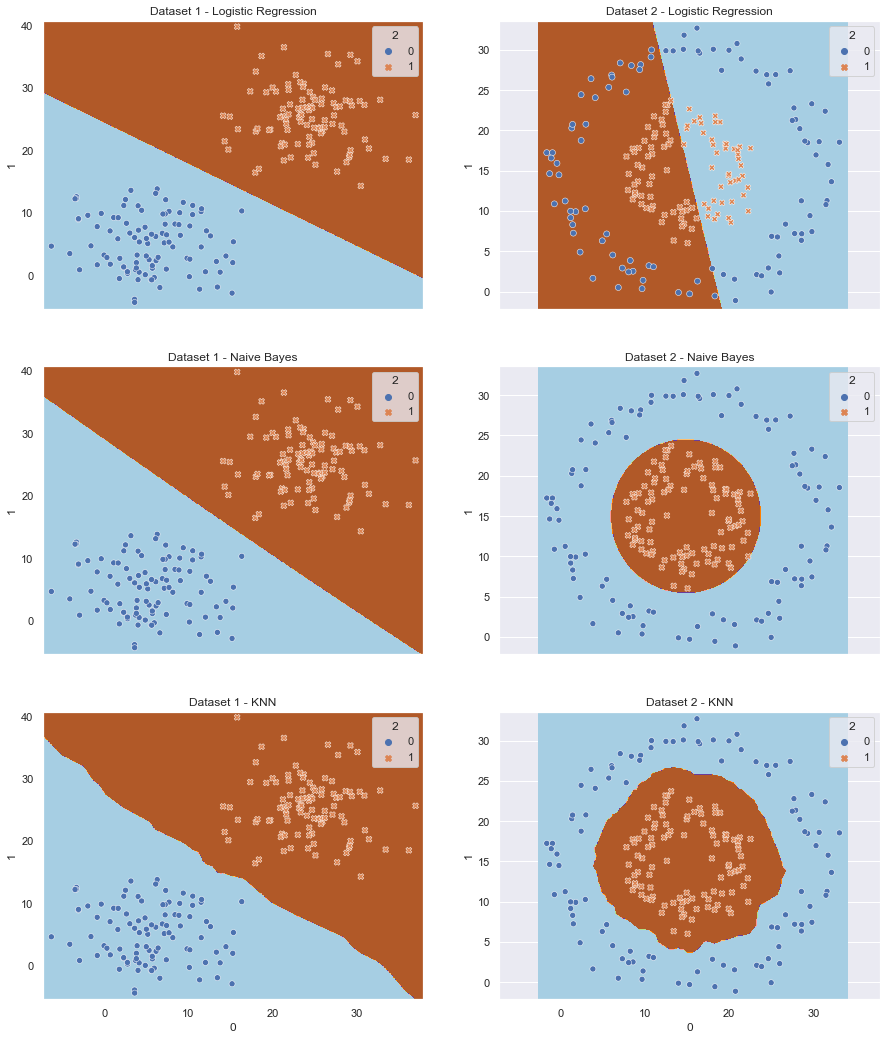

In [10]:
'''
Question 7 - Draw decision boundary for dataset 1 and dataset2
'''
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15,18))
'''
----- Dataset 1 -----
'''
xx, yy, zz = FindGrid(X1, t1, "logistic")
#Plot the grid of x, y and z values as a surface
axes[0,0].set_title("Dataset 1 - Logistic Regression")
axes[0,0].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[0,0], x=data1[0], y=data1[1], hue=data1[2], data=data1, style=data1[2])

xx, yy, zz = FindGrid(X1, t1, "naive")
axes[1,0].set_title("Dataset 1 - Naive Bayes")
axes[1,0].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[1,0], x=data1[0], y=data1[1], hue=data1[2], data=data1, style=data1[2])

xx, yy, zz = FindGrid(X1, t1, "knn")
axes[2,0].set_title("Dataset 1 - KNN")
axes[2,0].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[2,0], x=data1[0], y=data1[1], hue=data1[2], data=data1, style=data1[2])
'''
----- Dataset 2 -----
'''
xx, yy, zz = FindGrid(X2, t2, "logistic")
#Plot the grid of x, y and z values as a surface
axes[0,1].set_title("Dataset 2 - Logistic Regression")
axes[0,1].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[0,1], x=data2[0], y=data2[1], hue=data2[2], data=data2, style=data2[2])

xx, yy, zz = FindGrid(X2, t2, "naive")
axes[1,1].set_title("Dataset 2 - Naive Bayes")
axes[1,1].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[1,1], x=data2[0], y=data2[1], hue=data2[2], data=data2, style=data2[2])

xx, yy, zz = FindGrid(X2, t2, "knn")
axes[2,1].set_title("Dataset 2 - KNN")
axes[2,1].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[2,1], x=data2[0], y=data2[1], hue=data2[2], data=data2, style=data2[2])

The decision boundaries for dataset 1 are somewhat identical when using three different classifiers. The decision boundary of KNN is not strictly a linear line whereas the first two classifiers are linear. They all separate two datasets perfectly.
<br>
The decision boundaries for dataset 2 are different for each classifier. The logistic regression generates a linear decision boundary and it's not a perfect line that separates data points into their own space. The Naive Bayes classifier generates a circle containing all data points belonging to class 1 whereas the other points for class 2 are outside the circle. A similar decision boundary is generated by the KNN classifier. Even though it's not a perfectly circle, it still separates data points nicely.   

The logistic regression score for model 3 is 0.87
The Gaussian Naive Bayes score for model 3 is 0.885
The KNN score for model 3 is 1.0


<AxesSubplot:title={'center':'Dataset 3 - KNN'}, xlabel='0', ylabel='1'>

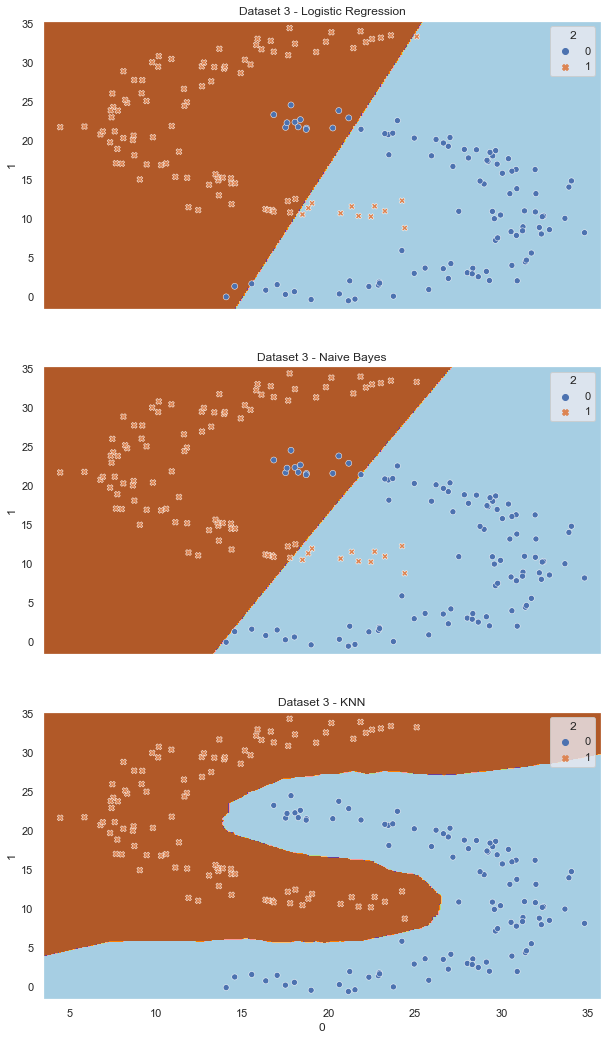

In [11]:
'''
Question 8 - Repeat experiments 2, 5, 6, and 7 with dataset 3
'''
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

X3 = np.array(data3.iloc[:,:-1])
t3 = np.array(data3.iloc[:,-1])
logistic_reg = LogisticRegression().fit(X3, t3)
R_squared = logistic_reg.score(X3, t3)
print(f"The logistic regression score for model 3 is {R_squared}")

fit3 = GaussianNB().fit(X3, t3)
R_squared  = fit3.score(X3, t3)
print(f"The Gaussian Naive Bayes score for model 3 is {R_squared}")

fit3 = KNeighborsClassifier().fit(X3, t3)
R_squared  = fit3.score(X3, t3)
print(f"The KNN score for model 3 is {R_squared}")

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,18))

xx, yy, zz = FindGrid(X3, t3, "logistic")
#Plot the grid of x, y and z values as a surface
axes[0].set_title("Dataset 3 - Logistic Regression")
axes[0].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[0], x=data3[0], y=data3[1], hue=data3[2], data=data3, style=data3[2])

xx, yy, zz = FindGrid(X3, t3, "naive")
axes[1].set_title("Dataset 3 - Naive Bayes")
axes[1].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[1], x=data3[0], y=data3[1], hue=data3[2], data=data3, style=data3[2])

xx, yy, zz = FindGrid(X3, t3, "knn")
axes[2].set_title("Dataset 3 - KNN")
axes[2].contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(ax=axes[2], x=data3[0], y=data3[1], hue=data3[2], data=data3, style=data3[2])

The score for the logistic regression is 0.87, which gives good (but not perfect) predictions.
<br>
The score for the Naive Bayes classifier is 0.885, which is slightly higher than the linear regression classifier (0.87).
<br> 
The score for the KNN classifier is 1.0, which is higher than the linear regression classifier (0.87).
<br>
The first two classifiers (logistic and Naive Bayes) generate a linear decision boundary whereas the KNN classifier generates a non-linear decision boundary. Since the KNN classifier perfectly divides the data points into two different set, its score for this model is 1.0 and it can accurately generate predictions. The decision boundaries for the first two classifiers have some points from class 1 in the space of class 2, and vice versa. Therefore, their scores are lower than the KNN classifier.